In [4]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, BaseMessage
from IPython.display import display, Image

In [5]:
llm = ChatOllama(
    model="llama3.2",  # Tem que ser o mesmo modelo que você baixou no Passo 1
    base_url="http://localhost:11434",
    temperature=0
)

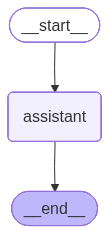

In [6]:
class State(TypedDict):
    messages: List[BaseMessage]

# --- 3. Definição dos Nós (Nodes) ---
def assistant_node(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# --- 4. Construção do Grafo ---
builder = StateGraph(State)

# Adiciona o nó que processa a IA
builder.add_node("assistant", assistant_node)

# Define o fluxo: Início -> Assistant -> Fim
builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

# Compila o grafo
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
# --- 5. Execução ---
print("Conectando ao Ollama no Docker...")

input_message = HumanMessage(content="Crie uma frase curta sobre Docker e IA.")
result = graph.invoke({"messages": [input_message]})

# Pega a última mensagem (resposta da IA)
ai_response = result["messages"][-1].content

print("-" * 30)
print(f"RESPOSTA: {ai_response}")
print("-" * 30)

Conectando ao Ollama no Docker...
------------------------------
RESPOSTA: "Com a combinação de Docker e Inteligência Artificial, é possível automatizar a criação e gestão de ambientes de desenvolvimento de aplicativos de forma mais eficiente e escalável."
------------------------------
